In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv("E:\\Data Science\\Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
#Creating new cols NewSales and dividing 'Sales' cols on the basis of [0,8.96,16.27] for Low and High
df["NewSales"] = pd.cut(df["Sales"], bins = [-1,8.96,16.27], labels = ["Low", "High"])

In [5]:
df.drop(['Sales'],axis=1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,NewSales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [5]:
df['NewSales'].dtype


CategoricalDtype(categories=['Low', 'High'], ordered=True)

In [6]:
df['NewSales'].unique()

['High', 'Low']
Categories (2, object): ['Low' < 'High']

In [8]:
df['NewSales'].value_counts()

Low     284
High    116
Name: NewSales, dtype: int64

In [9]:

label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['NewSales']=label_encoder.fit_transform(df['NewSales'])

In [10]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,NewSales
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [11]:
df_scaled=scale(df)

In [12]:
data=pd.DataFrame(df_scaled)

In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.710376,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881,-1.564697
1,1.320179,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881,-1.564697
2,0.908917,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881,-1.564697
3,-0.034151,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881,0.639101
4,-1.186395,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925,0.639101


In [14]:
data.columns = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','NewSales']

In [15]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,NewSales
0,0.710376,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881,-1.564697
1,1.320179,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881,-1.564697
2,0.908917,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881,-1.564697
3,-0.034151,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881,0.639101
4,-1.186395,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925,0.639101


In [16]:
x=data.iloc[:,0:11]
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.710376,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,1.320179,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,0.908917,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.034151,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,-1.186395,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...,...
395,1.798804,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869,0.741881
396,-0.480867,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908,0.741881
397,-0.030605,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869,0.741881
398,-0.551774,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869,0.741881


In [17]:
y=df['NewSales']
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: NewSales, Length: 400, dtype: int32

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

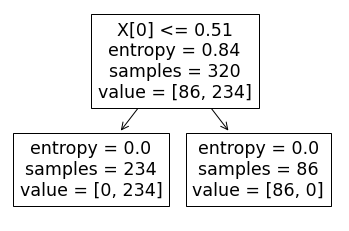

In [21]:
tree.plot_tree(model);

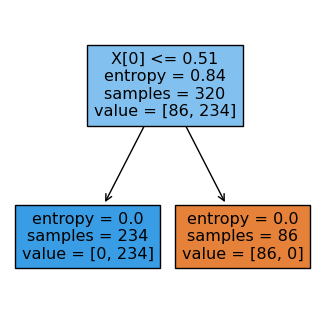

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=100)
cn=['low','high']
class_name=cn
tree.plot_tree(model,filled=True);

In [23]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    50
0    30
dtype: int64

In [24]:
# Accuracy 
np.mean(preds==y_test)

1.0

## Building Decision Tree Classifier (CART) using Gini Criteria

In [25]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [26]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [28]:
np.mean(pred==y_test)

1.0